In [1]:
# Thompson Sampling (Posterior Sampling or Probability Matching) is an algorithm for choosing the actions that address the exploration-exploitation dilemma in multi-armed bandit problem. 
# Note:
#     Exploration: It allows the agent to improve its knowledge about each action. Hopefully, leading to a long-term benefit.
#     Exploitation: It allows the agent to choose the greedy action to try to get the most reward for short-term benefit. A pure greedy action selection can lead to sub-optimal behaviour.

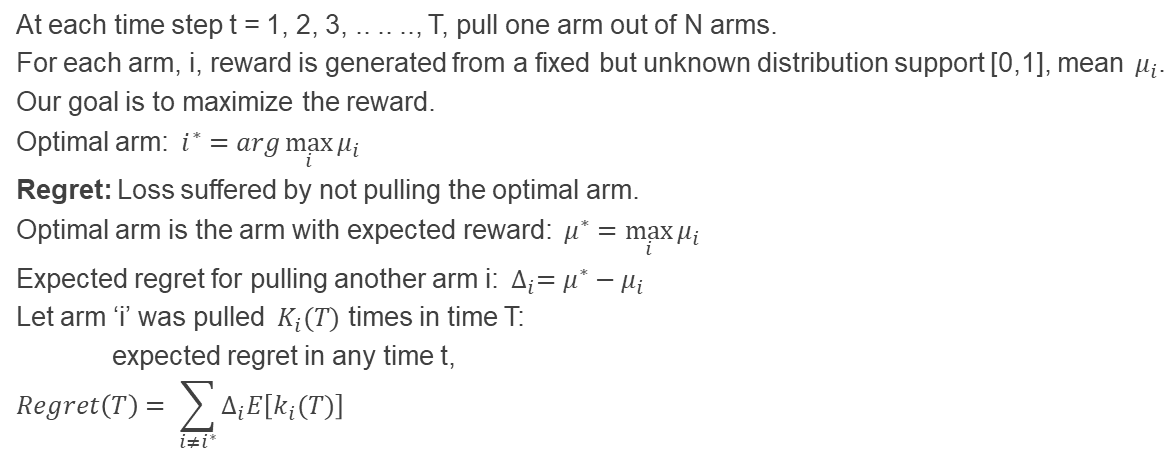

In [2]:
from IPython.display import Image
Image(filename = 'Thompson_Sampling_Algo.png', width=800, height=400)

In [3]:
# Step 1: Importing the important libraries
"""
1. NumPy: is a general-purpose array-processing package and scientific computing package.
2. Pandas: is an open source package widely used for data science/data analysis and machine learning tasks.
3. Matplotlib: is a cross-platform, data visualization and graphical plotting library and its numerical extension NumPy.
"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Step 2: Read the dataset
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

In [5]:
# Step 2.1: Exploration of the dataset
# Check the head of the dataset
dataset.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


In [6]:
# Step 2.2: Exploration of the dataset
# Check the tail of the dataset
dataset.tail()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
9995,0,0,1,0,0,0,0,1,0,0
9996,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0
9998,1,0,0,0,0,0,0,1,0,0
9999,0,1,0,0,0,0,0,0,0,0


In [7]:
# Step 2.3: Exploration of the dataset
# Check the decoration of the dataset
dataset.columns

Index(['Ad 1', 'Ad 2', 'Ad 3', 'Ad 4', 'Ad 5', 'Ad 6', 'Ad 7', 'Ad 8', 'Ad 9',
       'Ad 10'],
      dtype='object')

In [8]:
# Step 2.4: Exploration of the dataset
dataset.describe()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,0.170300,0.129500,0.072800,0.119600,0.269500,0.012600,0.111200,0.209100,0.095200,0.04890
std,0.375915,0.335769,0.259821,0.324509,0.443722,0.111546,0.314395,0.406686,0.293506,0.21567
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [9]:
# Step 3: Implementing Thompson Sampling
import random
N = 10000
d = 10
ads_selected = []
numbers_of_rewards_1 = [0] * d
numbers_of_rewards_0 = [0] * d
total_reward = 0
for n in range(0, N):
    ad = 0
    max_random = 0
    for i in range(0, d):
        random_beta = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)
        if random_beta > max_random:
            max_random = random_beta
            ad = i
    ads_selected.append(ad)
    reward = dataset.values[n, ad]
    if reward == 1:
        numbers_of_rewards_1[ad] = numbers_of_rewards_1[ad] + 1
    else:
        numbers_of_rewards_0[ad] = numbers_of_rewards_0[ad] + 1
    total_reward = total_reward + reward

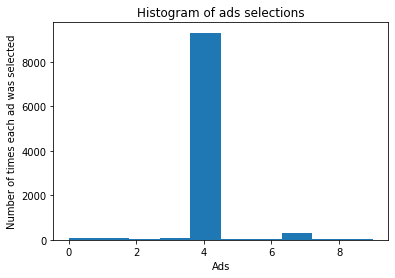

In [10]:
# Step 4: Visualising the results - Histogram
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

In [11]:
print('Congratulation: Task accomplished to design a Thompson Sampling algorithm model.')

Congratulation: Task accomplished to design a Thompson Sampling algorithm model.
